In [2]:
# Reading the dataset
# Importing pandas library
import pandas as pd
# Loading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood.csv')

In [3]:
seed = 7

In [4]:
mydata

,Time,Area,RH,ET,P,AT,SM,GHF
0,1/1/2005,3563530.00,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,1/2/2005,3474497.25,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,1/3/2005,3467959.75,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,1/4/2005,3605078.50,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,1/5/2005,3945098.25,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815
...,...,...,...,...,...,...,...,...
3989,12/4/2015,2558446.25,70.756050,0.000004,0.084317,4.142236,1.330013,-15.481495
3990,12/5/2015,2553516.75,76.970886,0.000004,0.119789,4.088312,1.323480,-12.413648
3991,12/6/2015,2552695.50,80.957146,0.000003,0.182801,5.052332,1.317485,-3.347597
3992,12/7/2015,2545706.50,79.400673,0.000004,0.241517,6.233972,1.313668,-6.115736


In [5]:
mydata.describe()

,Area,RH,ET,P,AT,SM,GHF
count,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,2.828388e+06,15.020703,0.000024,3.134611,14.031194,1.222583,0.558555
std,1.235075e+06,594.092895,0.000017,5.791662,10.815100,0.146059,12.848126
min,1.170620e+06,-9999.000000,-0.000001,0.000000,-15.540076,0.698136,-68.185898
25%,1.863795e+06,42.761028,0.000007,0.055491,5.142480,1.134451,-5.466526
50%,2.569146e+06,49.047647,0.000021,0.479799,14.949548,1.248526,2.817404
75%,3.612540e+06,56.245806,0.000040,3.720712,23.502130,1.332297,8.202606
max,6.852320e+06,94.331871,0.000062,72.185623,35.047968,1.548314,57.051323


In [ ]:
# Preparing the output and input data

In [ ]:
# The output variable or target y

In [6]:
y = mydata['Area']

In [7]:
y.shape

(3994,)

In [8]:
print(y[:5])

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64


In [ ]:
# The features or input variables, X

In [9]:
X = mydata.drop(['Time', 'Area'], axis = 1)

In [10]:
X.shape

(3994, 6)

In [11]:
print(X[:3])

          RH        ET          P         AT        SM        GHF
0  65.396004  0.000003   3.757262  12.265436  1.301278  17.165691
1  68.874268  0.000002   4.382504  13.751855  1.320082  18.168137
2  77.067459  0.000004  17.027948  10.879114  1.377332   1.645442


In [ ]:
# VIF and Scaling the features

In [13]:
# Splitting the dataset into training and testing datasets
# Importing traini_test_split () 
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30, shuffle = True)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2995, 6) (999, 6) (2995,) (999,)


In [20]:
# Importing necessary functions and libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from numpy import absolute
# Importing warnings() to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Hyperparameter Tuning using Ridge Regression

In [24]:
rg_model = Ridge()
rg_params = {'solver': ['svd', 'cholesky', 'lsqr', 'saq'],
             'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
             'fit_intercept': [True, False]
}
rg_cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
rg_grid = GridSearchCV(rg_model, rg_params, cv = rg_cv, scoring = 'neg_mean_squared_error', n_jobs = -1)
rg_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'saq']},
             scoring='neg_mean_squared_error')

In [26]:
# Printing the best parameters and score
print('The best parameters are:', rg_grid.best_params_)
print('The best score is:', rg_grid.best_score_)

The best parameters are: {'alpha': 1e-05, 'fit_intercept': True, 'solver': 'cholesky'}
The best score is: -516560717582.91565


In [27]:
# Ridge regression modeling using the best parameters and fitting it on the training dataset
# Initialization
model = Ridge(alpha = 1e-5, fit_intercept = True, solver = 'cholesky')

In [28]:
# Fitting on the training dataset
rg = model.fit(X_train, y_train)

In [32]:
# Model performance evaluation on the training dataset
rg_predtr = rg.predict(X_train)
print('The training r-sq is:', r2_score(y_train, rg_predtr))
print('The training MAE is:', mean_absolute_error(y_train, rg_predtr))
print('The training MSE is:', mean_squared_error(y_train, rg_predtr))

The training r-sq is: 0.6612965133015969
The training MAE is: 553681.5064041666
The training MSE is: 515952160615.08734


In [36]:
# Performance on the testing dataset
rg_predts = rg.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, rg_predts))
print('The testing MAE is:', mean_absolute_error(y_test, rg_predts))
print('The testing MSE is:', mean_squared_error(y_test, rg_predts))

The testing r-sq is: 0.6631239645492988
The testing MAE is: 547894.207272673
The testing MSE is: 515131358658.27026


In [ ]:
# Cross-validation

In [37]:
# On the training dataset
rg_cvtr = cross_val_score(rg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [38]:
rg_cvtr

array([-5.57906300e+11, -4.69151472e+11, -5.04743360e+11, -4.95330561e+11,
       -5.62695370e+11])

In [39]:
print('The absolute mean train cv score is:', absolute(np.mean(rg_cvtr)))

The absolute mean train cv score is: 517965412592.07733


In [41]:
# On the testing dataset
rg_cvts = cross_val_score(rg, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)

In [42]:
print('The absolute mean testing cv score is:', absolute(np.mean(rg_cvts)))

The absolute mean testing cv score is: 518700401294.5721


In [ ]:
# Plotting the residuals and prediction error
# conda install conda-forge::yellowbrick

In [43]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

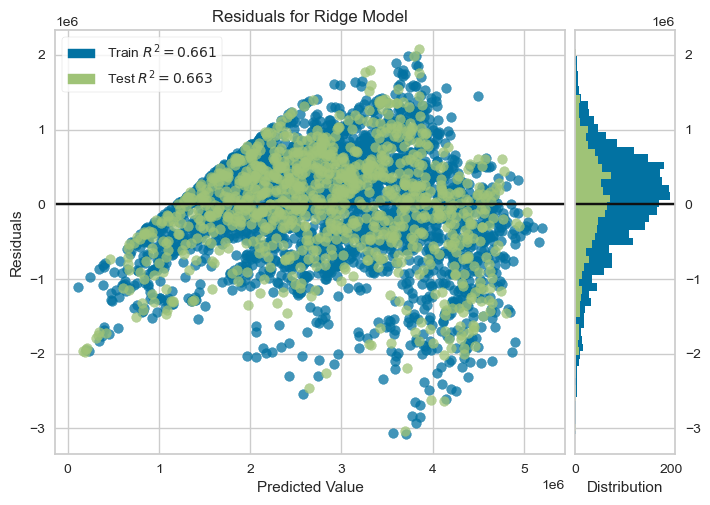

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(rg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [45]:
# Plotting the prediction error
from yellowbrick.regressor import PredictionError

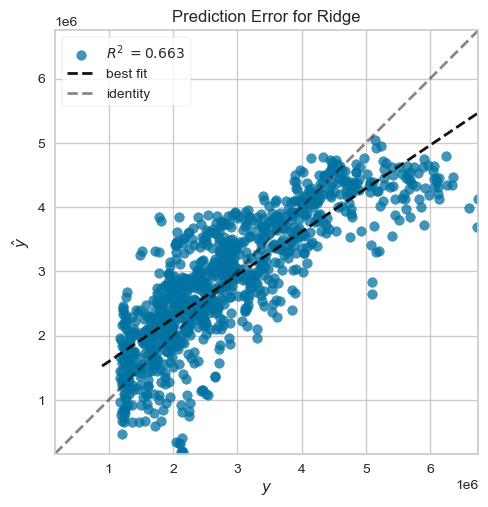

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
visualizer = PredictionError(rg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [49]:
# Plotting the observed against the predicted data
import matplotlib.pyplot as plt

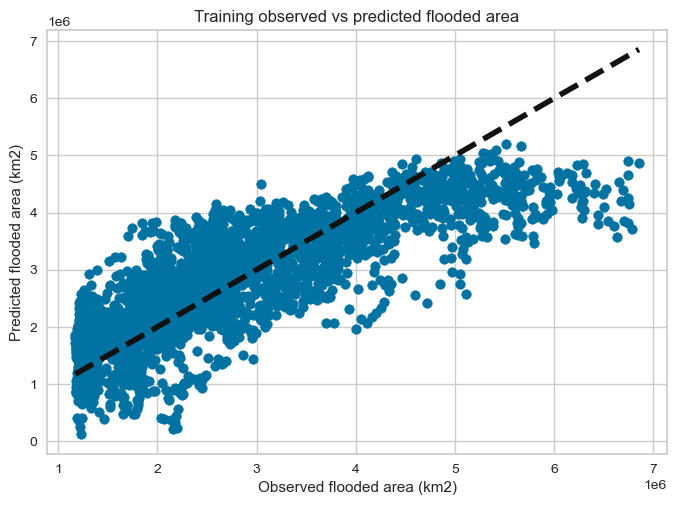

In [54]:
# For the training dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_train, rg_predtr)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw = 4) # Line of best fit
# Labelling
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Training observed vs predicted flooded area')
plt.show()

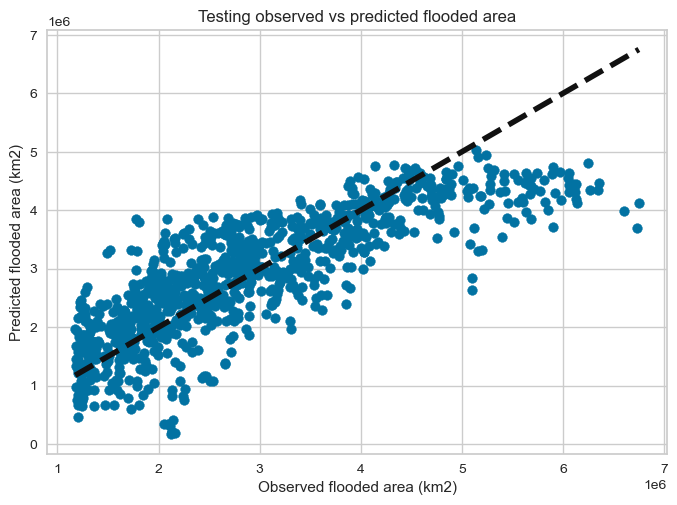

In [56]:
# For the testing dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_test, rg_predts)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4) # Line of best fit
# Labelling
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Testing observed vs predicted flooded area')
plt.show()

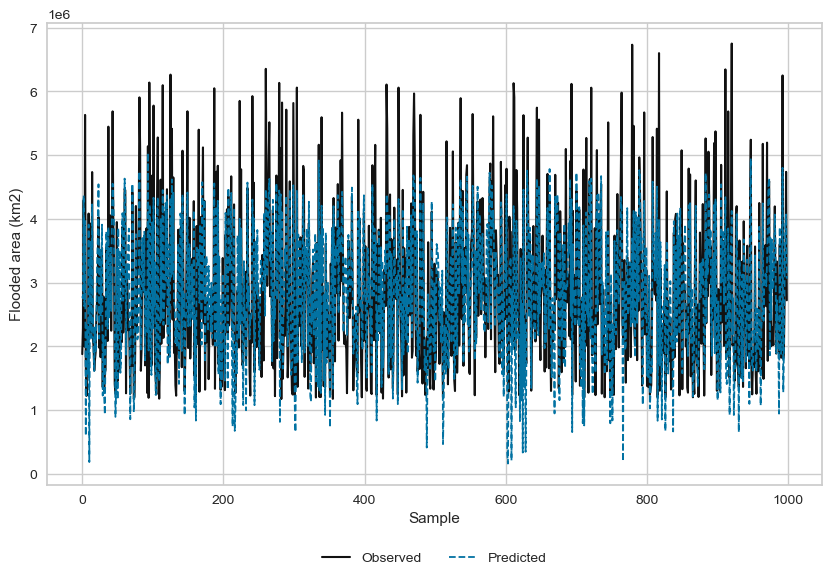

In [62]:
# Plotting the observed and predicted data
# Setting the boundaries and characteristics of the plot
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, rg_predts, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.3)
plt.xlabel('Sample')
plt.ylabel('Flooded area (km2)')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

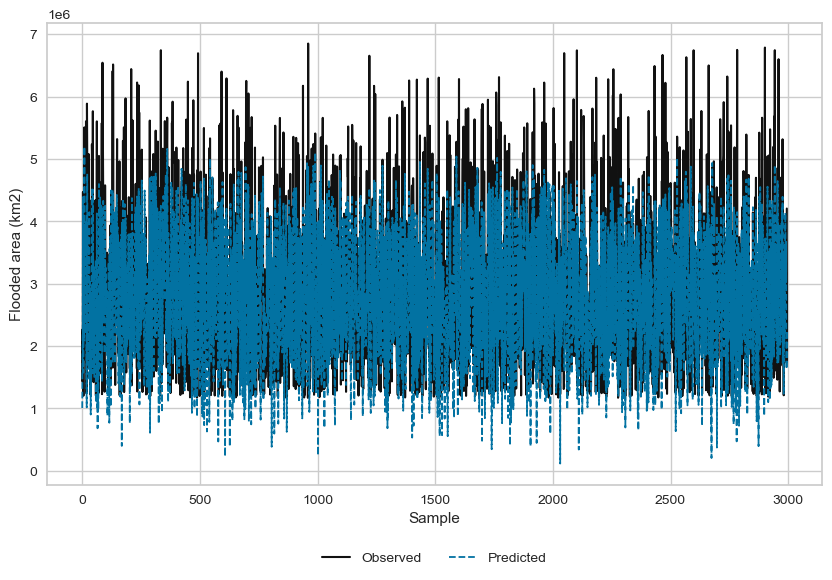

In [63]:
# Plotting the observed and predicted data
# Setting the boundaries and characteristics of the plot
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_train))
plt.plot(x_ax, y_train, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, rg_predtr, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.3)
plt.xlabel('Sample')
plt.ylabel('Flooded area (km2)')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()